<a href="https://colab.research.google.com/github/nbuggies/CNN/blob/main/CNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please mount your Google drive, and set up your working folder path here.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# start your code here
os.chdir("/content/drive/MyDrive/Homework9") # change your working folder here
# end your code here

# Convolutional Neural Networks: Gesture Classification

Welcome to our thrid module! In this notebook, you will:

- Implement a fully functioning ConvNet using TensorFlow 

**After this assignment you will be able to:**

- Build and train a ConvNet in TensorFlow for a classification problem 

We assume here that you are already familiar with TensorFlow. 

## 1.0 - TensorFlow model

As usual, we will start by loading in the packages. 


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.keras import datasets, layers, models
from cnn_utils import *

%matplotlib inline
np.random.seed(1)
tf.random.set_seed(1234)

Run the next cell to load the "SIGNS" dataset you are going to use.

In [ ]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

![alt text](https://drive.google.com/uc?id=1db9mIM_lD4StTKhab9nfLfdCSLjXG3Cf)
The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 2


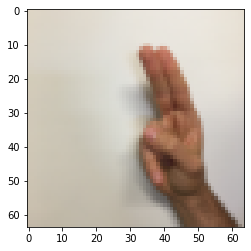

In [ ]:
# Example of a picture
index = 1000
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

To get started, let's examine the shapes of your data. 

In [ ]:
# what do the following two lines do?
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Next, we will convert the value 0,1,2,3,4,5 to a one-hot column. 
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### 1.1 - Create the convolutional base

In TensorFlow, there are built-in functions that carry out the convolution steps for you.

- **tf.keras.models.Sequential()** groups a linear stack of layers into a neural networt model. You can read the full documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
- **tf.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', activation=None, input_shape=(32, 32, 3), kernel_initializer='glorot_uniform'):** 'filters' specifies the number of filters in this Conv layer. 'kernel_size' indicates the height and the width of the filters, e.g., (3,3) means a 3 by 3 filter. The third input 'strides' represents the strides for the height and the width of the input (n_H_prev, n_W_prev) with default value (1,1). 'padding' can be 'valid'(default) or 'same'. You can choose your activation function in the input 'activation'. You may want to specify your image shape in 'input_shape'. (32,32,3) means this is a 32 by 32 RGB image. 'kernel_initializer' specifies how you want to initialize your filter. You can read the full documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- **tf.keras.layers.MaxPooling2D(pool_size=(f, f), strides=(s,s), padding='valid'):** this function uses a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window. You can read the full documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

**Exercise**: 

Build the following model: `CONV2D -> MAXPOOL -> CONV2D -> MAXPOOL`. You should use the functions above. 

In detail, we will use the following parameters for all the steps:

     - Conv2D: 8 filters with size (4,4), stride 1, padding is "same", activation function is 'Relu', input_shape=(64,64,3), filter initializer is 'glorot_uniform'
     - Max pool: Use an 8 by 8 filter size and an 8 by 8 stride, padding is "same"
     - Conv2D: 16 filters with size (2,2), stride 1, padding is "same", activation function is 'Relu', filter initializer is 'glorot_uniform', input shape will be decided automatically
     - Max pool: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "same"

In [ ]:
# GRADED steps

model = models.Sequential()
#add a conv layer: 8 filters with size (4,4), stride (1,1), padding is 'same', activation function is 'relu', input_shape=(64,64,3), filter initializer is 'glorot_uniform'
model.add(tf.keras.layers.Conv2D(8,
                                 (4,4),
                                 strides=(1,1), 
                                 padding='same', activation='relu', 
                                 input_shape=(64,64,3), 
                                 kernel_initializer='glorot_uniform',
                                 kernel_regularizer=tf.keras.regularizers.L2(0.01)))
#add a MAXPOOL layer: window 8x8, sride (8,8), padding 'same'
model.add(tf.keras.layers.MaxPooling2D(pool_size=(8,8), strides=(8,8), padding='same'))

### START CODE HERE ###
#add the second conv layer: 16 filters with size (2,2), stride (1,1), padding is "same", activation function is 'relu', filter initializer is 'glorot_uniform', input shape will be decided automatically
model.add(tf.keras.layers.Conv2D(16,
                                 (2,2),
                                 strides=(1,1), 
                                 padding='same', activation='relu', 
                               
                                 kernel_initializer='glorot_uniform',
                                 kernel_regularizer=tf.keras.regularizers.L2(0.01)))
#add the second MAXPOOL layer: window 4x4, stride (4,4), padding 'same'
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same'))
### END CODE HERE ###

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
Total params: 920
Trainable params: 920
Non-trainable params: 0
_________________________________________________________________


**Expected Output**:

![alt text](https://urldefense.com/v3/__https://drive.google.com/uc?id=16G8b6zw23HkPTSmKKboIVqB_ehiDE9BL__;!!PhOWcWs!lj_KcD0A6Xl-_k4Lj8Ll_SLpdbsvdvk2BUHx7Ca3ALRgep71u_2GAgTSv5pO1_y0ZRQV_so$ )

### 1.2 - Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. There are built-in functions that carry out these steps for you.

- **tf.keras.layers.Flatten()**: this function flattens each example into a 1D vector while maintaining the batch-size. It returns a flattened tensor with shape [batch_size, k]. You can read the full documentation [here.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
- **tf.keras.layers.Dense(num_outputs):** It returns the output computed using a fully connected layer. You shall specify the number of outputs in 'num_outputs'. You can read the full documentation [here.](https://urldefense.com/v3/__https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
In the last function above (`tf.keras.layers.Dense`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need to initialize those weights when initializing the parameters. 

**Exercise**: 

Build the fully connected (Dense) layer on the Conv base: `CONV2D -> MAXPOOL -> CONV2D -> MAXPOOL -> FLATTEN -> DENSE`. You should use the functions above. 

- Flatten the previous output.
- FULLYCONNECTED (Dense) layer: Apply a fully connected layer with activation function 'softmax'. Multi-class classification problems usually use 'softmax' as the activation function in the output layer if the target output is a 'one-hot' function.

In [ ]:
# add the FLATTEN layer: tf.keras.layers.Flatten()
model.add(tf.keras.layers.Flatten())

### START CODE HERE ###
# Please add a dense layer with 6 neurons, and activation function 'softmax'
model.add(tf.keras.layers.Dense(6, activation='softmax'))
          
### END CODE HERE ###

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 flatten_1 (Flatten)         (None, 64)               

As you can see, our (2, 2, 16) outputs were flattened into vectors of shape (64) before going through the Dense layer.

**Expected Output**:

![alt text](https://urldefense.com/v3/__https://drive.google.com/uc?id=15jEv_qKYS0r95tiXQbcuS6PxlBnKcb4R__;!!PhOWcWs!lj_KcD0A6Xl-_k4Lj8Ll_SLpdbsvdvk2BUHx7Ca3ALRgep71u_2GAgTSv5pO1_y0UEdgN_4$ )

### 1.3 - Compile and train the model
When compiling the model, you will specify the optimizer, the loss function, and the metric you are going to use. 

- **compile(optimizer=None, loss=None, metrics=None)** You can check the full documentation  [here.](https://urldefense.com/v3/__https://www.tensorflow.org/api_docs/python/tf/keras/Model*compile)
- **tf.keras.losses.CategoricalCrossentropy()** You can check the full documentation  [here.](https://urldefense.com/v3/__https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

**Exercise**: Compile the model using 'tf.keras.optimizers.Adam(learning_rate=None)' as the optimizer, 'tf.keras.losses.CategoricalCrossentropy()' as the loss function, and 'accuracy' as the metrics.

Now, we are ready to train the model. During the training process, you need to specify training input, training output, epoch number and batch size. The samples will be shuffled by default. 

-**model.fit(x=None, y=None, batch_size=None, epochs=1,validation_split=0.0)**

**Exercise**: train the model with epoch number no more than 400. 

Please adjust the learning_rate in the adam optimizer and the batch_size in 'model.fit' such that the accuracy of the training set is above 92% at the end of the training.


Epoch 1/100
16/16 [==============================] - 1s 37ms/step - loss: 0.8359 - accuracy: 0.6996 - val_loss: 0.8777 - val_accuracy: 0.7037
Epoch 2/100
16/16 [==============================] - 0s 14ms/step - loss: 0.8296 - accuracy: 0.7088 - val_loss: 0.8969 - val_accuracy: 0.6944
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 0.8148 - accuracy: 0.7119 - val_loss: 0.8908 - val_accuracy: 0.7130
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 0.8173 - accuracy: 0.7150 - val_loss: 0.8718 - val_accuracy: 0.7315
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 0.8224 - accuracy: 0.7047 - val_loss: 0.9120 - val_accuracy: 0.6852
Epoch 6/100
16/16 [==============================] - 0s 14ms/step - loss: 0.8190 - accuracy: 0.7037 - val_loss: 0.8806 - val_accuracy: 0.7037
Epoch 7/100
16/16 [==============================] - 0s 14ms/step - loss: 0.8109 - accuracy: 0.7130 - val_loss: 0.8812 - val_accuracy: 0.7222
Epoch 

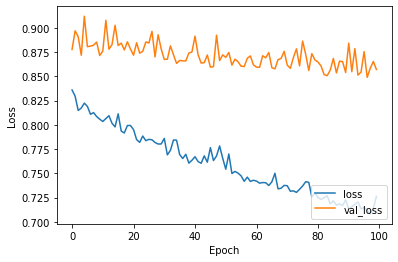

In [ ]:
# GRADED FUNCTION: compile the model 

# Compile the model using 'adam' as the optimizer, 'tf.keras.losses.CategoricalCrossentropy()' as the loss function, and 'accuracy' as the metrics.

### START CODE HERE ### 
model.compile(optimizer='adam',
          loss=tf.keras.losses.CategoricalCrossentropy(),
          metrics='accuracy')
### END CODE HERE ###

# GRADED FUNCTION: train the model 

# train the model with batch size = 64, and epoch number = 100.

### START CODE HERE ### 
history = model.fit(x=X_train , y=Y_train, batch_size=64, epochs=100,validation_split=0.1)
### END CODE HERE ###

## plot the training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#print('The training accuracy is', history.history['accuracy'][-1])

In [ ]:
# Now let's test your model in the test data to see how it works.
test_loss, test_acc = model.evaluate(X_test,  Y_test)
model.save('my_model.h5')

4/4 [==============================] - 0s 7ms/step - loss: 0.8023 - accuracy: 0.6833


**Expected output**
accuracy shall be higher than 0.75.

Congratulations! You have finised the assignment and built a model that recognizes SIGN language with almost 75% accuracy on the test set. You probably want to save your hard work, the trained model, using `model.save('my_model.h5')`. You can later load the saved model by the command `model = load_model('my_model.h5')`

Once again, here's a thumbs up for your work! 

In [ ]:
%pylab inline
import matplotlib.image as mpimg
img = mpimg.imread('images/thumbs_up.jpg')
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: ignored

**Challenge**: Can you try to adjust the hyper-parameters (learning_rate, epochs, batch_size, kernel_regularizer) to improve the accuracy to 85%? 

If you wish, feel free to play around with this dataset further. You can actually improve its accuracy by spending more time tuning the hyperparameters, or using regularization (as this model clearly has a high variance). It's quite easy to specify the regularization in the model. Simply, add option 'kernel_regularizer=tf.keras.regularizers.L2(0.001),' to the Conv and Dense layer